In [1]:
!pip install pandas
import pandas as pd

In [2]:
!conda install -c conda-forge fbprophet --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [3]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [9]:
data3 = pd.read_csv("ADBE (1).csv")
data4 = pd.read_csv("ADBE.csv")

from fbprophet.plot import plot_plotly, plot_components_plotly

data3=data3.rename(columns={'Date':'ds', 'Close':'y'})
data4=data4.rename(columns={'Date':'ds', 'Close':'y'})

In [10]:
data3.head()

,ds,Open,High,Low,y,Adj Close,Volume
0,2016-01-18,90.290001,91.400002,84.669998,89.629997,89.629997,17036600
1,2016-01-25,88.389999,89.260002,82.699997,89.129997,89.129997,19756300
2,2016-02-01,88.160004,90.239998,77.830002,79.199997,79.199997,23211300
3,2016-02-08,77.400002,78.330002,71.269997,76.669998,76.669998,35426100
4,2016-02-15,77.129997,82.820000,77.129997,80.870003,80.870003,16699800


In [11]:
m4 = Prophet(yearly_seasonality = True)

m4.fit(data3)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
future = m4.make_future_dataframe(periods = 228)
forecast = m4.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
432,2020-08-24,365.205433,349.526151,381.420481
433,2020-08-25,365.389888,349.887788,381.188699
434,2020-08-26,365.550494,350.367164,381.193463
435,2020-08-27,365.687892,349.671707,381.168219
436,2020-08-28,365.803349,350.083666,381.652753


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Close of stock')

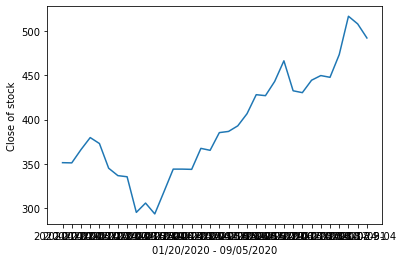

In [15]:

import matplotlib.pyplot as plt

plt.plot(data4.ds,data4.y)
plt.xlabel('01/20/2020 - 09/05/2020')
plt.ylabel('Close of stock')


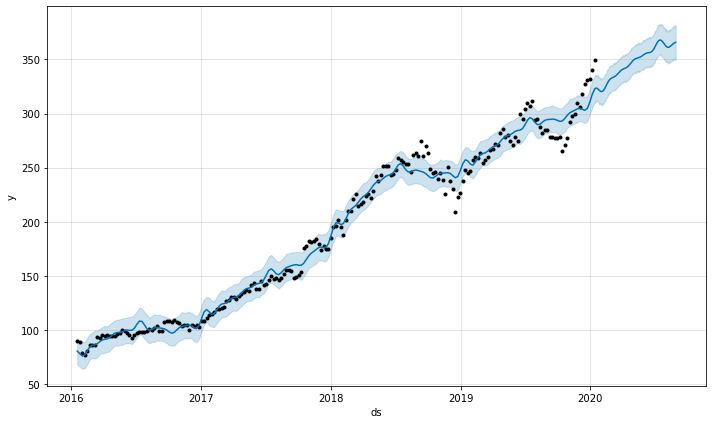

In [18]:
fig1 = m4.plot(forecast)

In [21]:
data4.tail()

,ds,Open,High,Low,y,Adj Close,Volume
29,2020-08-10,450.369995,455.899994,431.589996,447.600006,447.600006,9100400
30,2020-08-17,450.000000,479.799988,449.200012,473.220001,473.220001,11223200
31,2020-08-24,478.140015,533.700012,469.519989,516.440002,516.440002,19146300
32,2020-08-31,513.859985,536.880005,493.420013,507.799988,507.799988,13380300
33,2020-09-04,504.649994,511.350006,471.709991,491.940002,491.940002,3900326


In [22]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
432,2020-08-24,364.681981,349.526151,381.420481,356.266841,374.934618,0.523452,0.523452,0.523452,0.523452,0.523452,0.523452,0.0,0.0,0.0,365.205433
433,2020-08-25,364.878235,349.887788,381.188699,356.427745,375.254141,0.511653,0.511653,0.511653,0.511653,0.511653,0.511653,0.0,0.0,0.0,365.389888
434,2020-08-26,365.074489,350.367164,381.193463,356.614985,375.573664,0.476005,0.476005,0.476005,0.476005,0.476005,0.476005,0.0,0.0,0.0,365.550494
435,2020-08-27,365.270743,349.671707,381.168219,356.779706,375.893594,0.417149,0.417149,0.417149,0.417149,0.417149,0.417149,0.0,0.0,0.0,365.687892
436,2020-08-28,365.466997,350.083666,381.652753,356.914652,376.177841,0.336352,0.336352,0.336352,0.336352,0.336352,0.336352,0.0,0.0,0.0,365.803349


In [1]:
adobe_impact = (491.940002 - 365.803349)/365.803349 * 100
print("Adobe's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by\n", adobe_impact, "% as of 09/05/2020")

Adobe's stocks have been impacted by Covid-19(from the date when the first case was reported in the USA) against the normal flow by
 34.482093546934685 % as of 09/05/2020
